# Gaussian Process Belief Models

This notebook provides a few examples of how to use the `GaussianProcessBeliefs` belief model. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

## Instantiating Gaussian Process beliefs

First, we'll generate some noisy data with noise variance $\sigma^2_W = 0.02^2$.

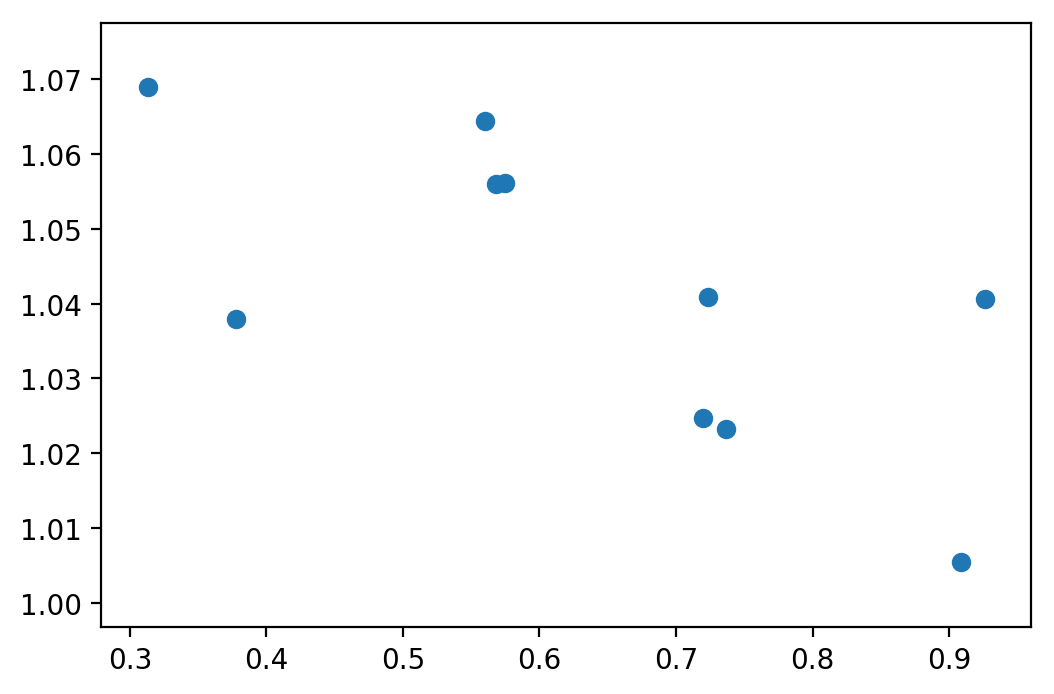

In [6]:
# Number of data points
N = 10

# Noise std
sigma_W = 0.02

# Data
x_data = np.random.uniform(0, 1, N)
y_data = 1 + 0.5*x_data - x_data**2 + 0.55*x_data**3 + np.random.normal(0, sigma_W, N)

# The homoscedastic noise model.
sig2_data = sigma_W**2*np.ones(N)

# Plot the data
plt.scatter(x_data, y_data)

To instantiate a Gaussian Process Belief model, you must specify:
* the prior mean $\mu_0$ constant value.
* the prior uncertainty value $\sigma^2_0$,
* length scales for each input variable
* the data.

In [7]:
from holmespy.beliefmodels import GaussianProcessBeliefs
B_0 = GaussianProcessBeliefs(1, 0.1**2, [0.1], data = np.array([x_data, y_data, sig2_data]).T)

Once specified, we can ask for the mean and covariance functions, $\mu(x)$ and $\Sigma(x, x^\prime)$, respectively. The inputs to these functions must be 1D numpy arrays or lists, even if $x$ is scalar.

In [9]:
# Mean and covariance function for beliefs
f_mean = B_0.mean()
cov = B_0.covariance()

# Evaluate mean and covariance functions
x_plot = np.linspace(0, 1, 100)
y_mean = np.array([f_mean([x]) for x in x_plot])
y_std = np.sqrt([cov([x], [x]) for x in x_plot])

Once we've evaluated the mean $\mu(x)$ and standard deviation function $\sqrt{\Sigma(x, x)}$, we can plot them to visualize the distribution $B_0$.

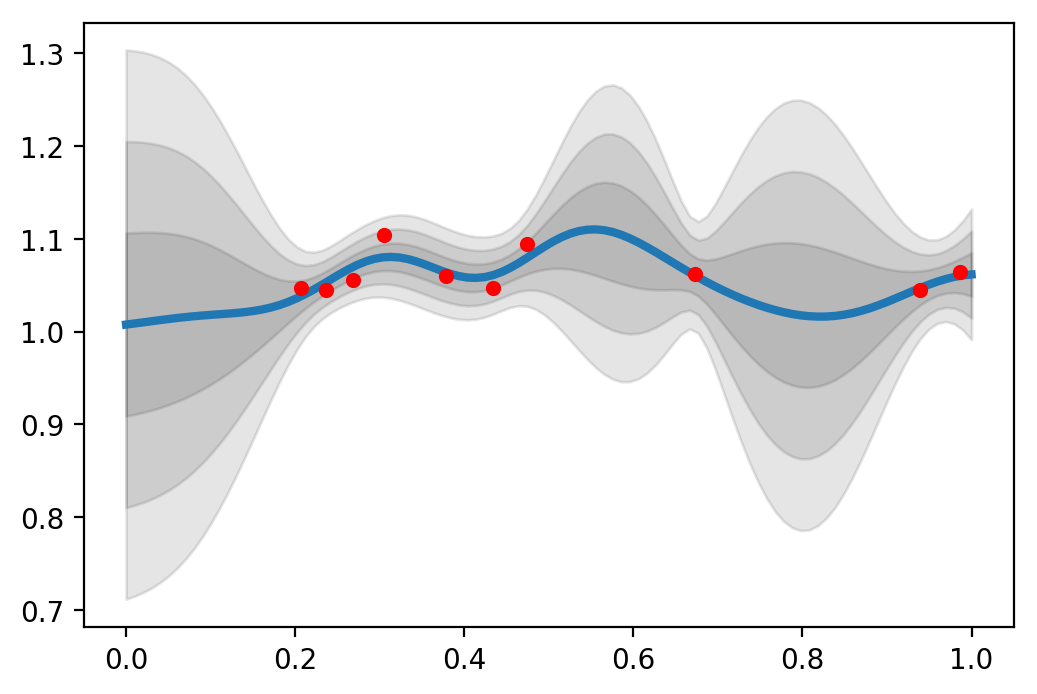

In [7]:
# Plot 3, 2, and 1 standard deviation uncertainty windows
plt.fill_between(x_plot, y_mean + 3*y_std, y_mean - 3*y_std, color = 'k', alpha = 0.1)
plt.fill_between(x_plot, y_mean + 2*y_std, y_mean - 2*y_std, color = 'k', alpha = 0.1)
plt.fill_between(x_plot, y_mean + y_std, y_mean - y_std, color = 'k', alpha = 0.1)

# Plot mean
plt.plot(x_plot, y_mean, linewidth=3)

# Plot data points
plt.scatter(x_data, y_data, color ='r', s = 20, zorder = 100)

Above, we ploted the mean function (blue line) and the first, second and third standard deviation uncertainty envelope representing $B_0$. We also plotted the original data points.

## Sampling

In addition to specifying the mean and covariance functions, we can also sample functions from $B_0$ using the `B_0.sample()` function.

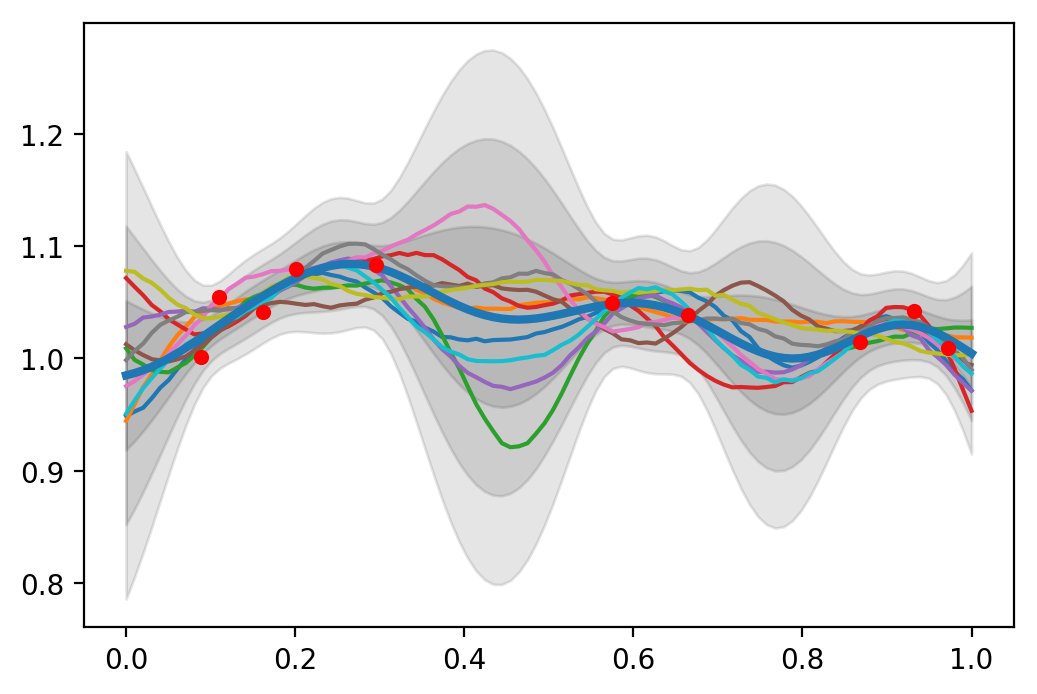

In [8]:
# Sample and plot several samples
for i in range(10):
    # Sample function
    f = B_0.sample()

    # Plot the sampled function
    y_plot = [f([x]) for x in x_plot]
    plt.plot(x_plot, y_plot)

# Plot beliefs (std deviations and mean)
plt.fill_between(x_plot, y_mean + 3*y_std, y_mean - 3*y_std, color = 'k', alpha = 0.1)
plt.fill_between(x_plot, y_mean + 2*y_std, y_mean - 2*y_std, color = 'k', alpha = 0.1)
plt.fill_between(x_plot, y_mean + y_std, y_mean - y_std, color = 'k', alpha = 0.1)
plt.plot(x_plot, y_mean, linewidth=3)

# Plot data points
plt.scatter(x_data, y_data, color ='r', s = 20, zorder = 100)

We see that the samples stay well within the uncertainty envelope.

Sampling is performed lazily, as in the sampled function does not assign a value to a particular $x$ input until it is needed. When it is needed, an underlying auxillary gaussian process is sampled from, and the observed value is used to retrain this gaussian process for consistency. This sampling/retraining is actually only done if the standard deviation $\sigma(x)$ is larger than a predefined threshold, which can be passed in the constructor of the beliefs. 

Here are samples when this threshold, `sample_tol`, is 0.1.

0.1**2 * RBF(length_scale=0.1)


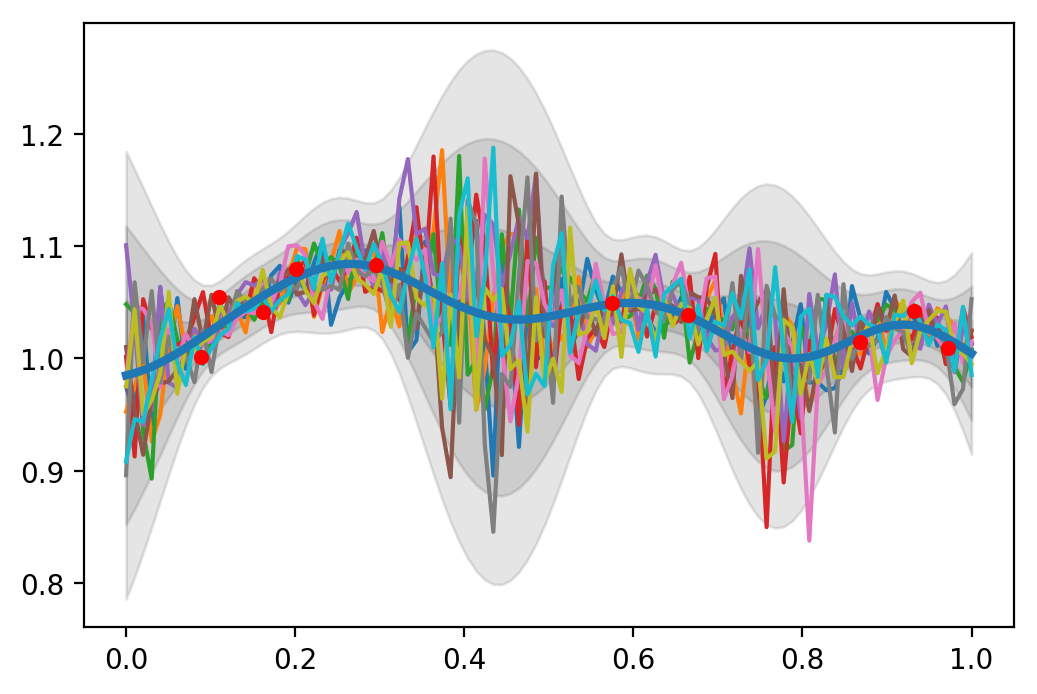

In [10]:
B_0 = GaussianProcessBeliefs(1, 0.1**2, [0.1], data = np.array([x_data, y_data, sig2_data]).T, sample_tol = 0.1)

# Sample and plot several samples
for i in range(10):
    # Sample function
    f = B_0.sample()

    # Plot the sampled function
    y_plot = [f([x]) for x in x_plot]
    plt.plot(x_plot, y_plot)

# Plot beliefs (std deviations and mean)
plt.fill_between(x_plot, y_mean + 3*y_std, y_mean - 3*y_std, color = 'k', alpha = 0.1)
plt.fill_between(x_plot, y_mean + 2*y_std, y_mean - 2*y_std, color = 'k', alpha = 0.1)
plt.fill_between(x_plot, y_mean + y_std, y_mean - y_std, color = 'k', alpha = 0.1)
plt.plot(x_plot, y_mean, linewidth=3)

# Plot data points
plt.scatter(x_data, y_data, color ='r', s = 20, zorder = 100)

This is much to noisy, indicating that the threshold was set too high. Below, we repeat the same but for `sample_tol = 1-5`

0.1**2 * RBF(length_scale=0.1)


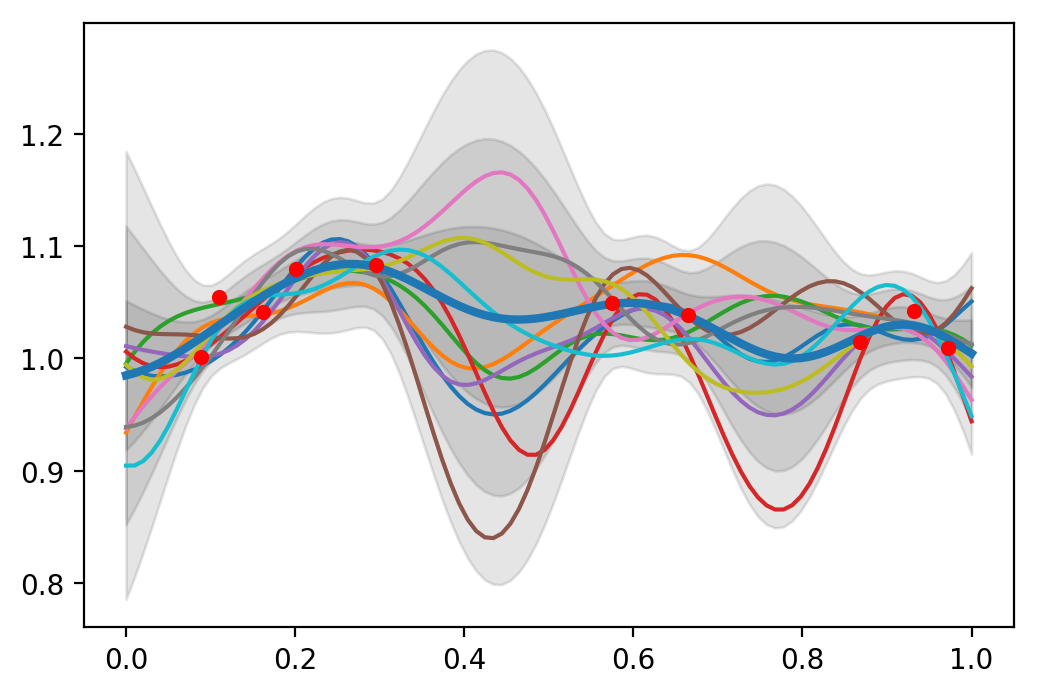

In [11]:
B_0 = GaussianProcessBeliefs(1, 0.1**2, [0.1], data = np.array([x_data, y_data, sig2_data]).T, sample_tol = 1e-5)

# Sample and plot several samples
for i in range(10):
    # Sample function
    f = B_0.sample()

    # Plot the sampled function
    y_plot = [f([x]) for x in x_plot]
    plt.plot(x_plot, y_plot)

# Plot beliefs (std deviations and mean)
plt.fill_between(x_plot, y_mean + 3*y_std, y_mean - 3*y_std, color = 'k', alpha = 0.1)
plt.fill_between(x_plot, y_mean + 2*y_std, y_mean - 2*y_std, color = 'k', alpha = 0.1)
plt.fill_between(x_plot, y_mean + y_std, y_mean - y_std, color = 'k', alpha = 0.1)
plt.plot(x_plot, y_mean, linewidth=3)

# Plot data points
plt.scatter(x_data, y_data, color ='r', s = 20, zorder = 100)

These are better results, but it took some time to run the code. The default value for `sample_tol` is `1e-3`, but this is really problem specific. This value is selected with the assumption that the output variable is O(1) throughout the entire domain.

0.1**2 * RBF(length_scale=0.1)


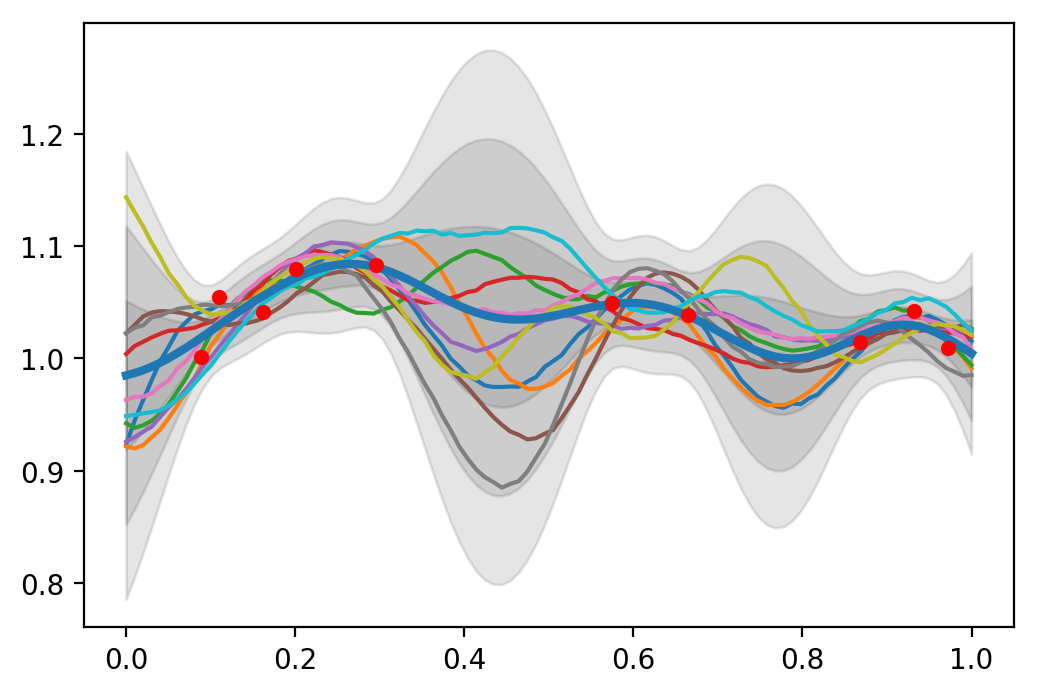

In [13]:
B_0 = GaussianProcessBeliefs(1, 0.1**2, [0.1], data = np.array([x_data, y_data, sig2_data]).T, sample_tol = 1e-3)

# Sample and plot several samples
for i in range(10):
    # Sample function
    f = B_0.sample()

    # Plot the sampled function
    y_plot = [f([x]) for x in x_plot]
    plt.plot(x_plot, y_plot)

# Plot beliefs (std deviations and mean)
plt.fill_between(x_plot, y_mean + 3*y_std, y_mean - 3*y_std, color = 'k', alpha = 0.1)
plt.fill_between(x_plot, y_mean + 2*y_std, y_mean - 2*y_std, color = 'k', alpha = 0.1)
plt.fill_between(x_plot, y_mean + y_std, y_mean - y_std, color = 'k', alpha = 0.1)
plt.plot(x_plot, y_mean, linewidth=3)

# Plot data points
plt.scatter(x_data, y_data, color ='r', s = 20, zorder = 100)

## Hyperparameter optimization

Hyperparameters for the kernel such as length scales and initial variance are specified in the constructor. By default these parameters are not optimized to their maximum likelihood estimates. To perform this hyperparameter optimization, you can pass in a positive value for the optional parameter `num_hyperparameter_fits`. This parameter determines the number of initial points from which to start the optimization. (Recall, this type of "restarting" is necessary when performing global optimization of complicated functions).

Below, we sample a ground truth with a length scale of 0.1, and generate data. We then fit GP models on this data, with the initial assumption that length scale is around 0.2. Below we test to see if the hyperparameter optimization can identify the underlying length scale of the (noisy) data.

In [13]:
B_truth = GaussianProcessBeliefs(1, 0.1**2, [0.1], data = np.array([x_data, y_data, sig2_data]).T, sample_tol = 1e-3)
f_truth = B_truth.sample()

# Sample data from the ground truth
x_data2 = np.random.uniform(0, 1, 20)
y_data2 = [f_truth([x]) + np.random.normal(0, sigma_W) for x in x_data2]
sig2_data2 = sigma_W**2*np.ones(len(x_data2))

B_1 = GaussianProcessBeliefs(1, 0.1**2, [0.2], num_hyperparameter_fits = 100, data = np.array([x_data2, y_data2, sig2_data2]).T, sample_tol = 1e-3)

print("Fitted kernel:")
B_1.print_kernel()

Fitted kernel:
0.0298**2 * RBF(length_scale=0.3)


## Experiment 1: Variance Trend

Given an initial uncertainty of 0.5, and data uncertainty of 0.2, how does the posterior uncertainty decrease as we keep measuring the same point?

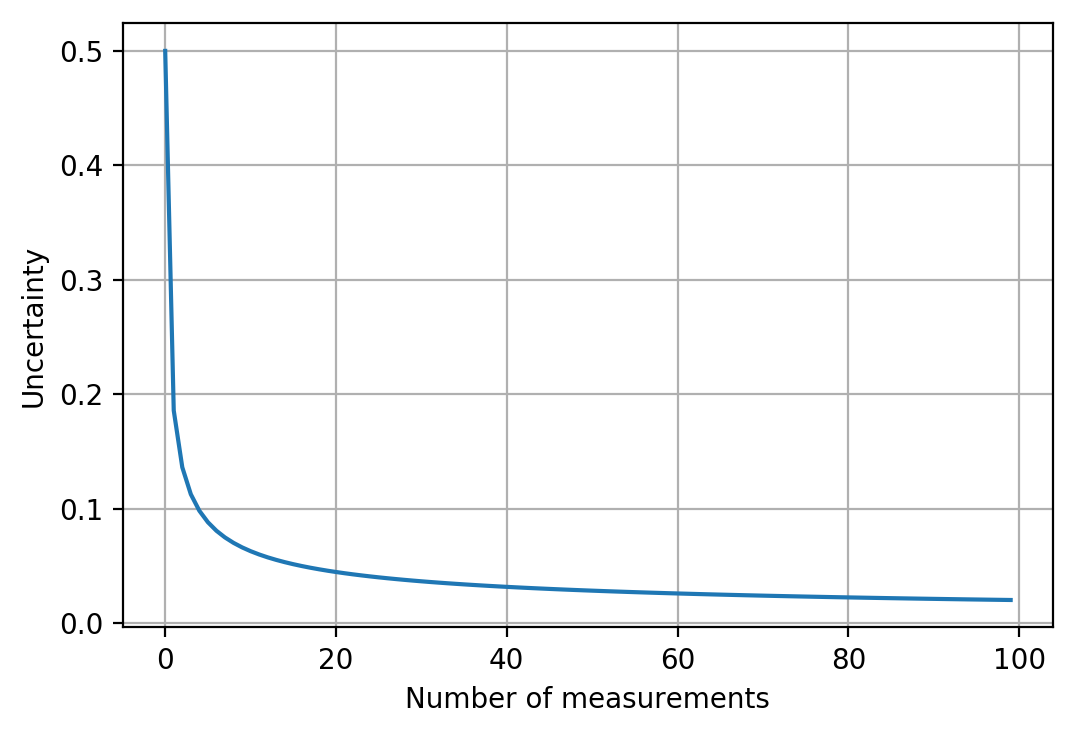

In [14]:
sigma_0 = 0.5
sigma_W = 0.2
N =  100
x = [0.5]

B_truth = GaussianProcessBeliefs(1, sigma_0**2, [0.1], data = np.array([x_data, y_data, sig2_data]).T, sample_tol = 1e-3)
f_truth = B_0.sample()
y_truth = [f_truth([xx]) for xx in x_plot]

B_0 = GaussianProcessBeliefs(1, sigma_0**2, [0.1], sample_tol = 1e-3)
y_prior = [B_0.mean_x([xx]) for xx in x_plot]

# Caculate uncertainty after repeateded measuremnet.
std_val = np.zeros(N)
for i in range(N):
    std_val[i] = np.sqrt(B_0.covariance_x(x, x))
    y = f_truth(x) + np.random.normal(0, sigma_W)
    B_0 = B_0.update(y, {
        'type': 'single',
        'input': x,
        'sigma2W': sigma_W**2
    })
y_posterior = [B_0.mean_x([xx]) for xx in x_plot]
    
plt.plot(std_val)
plt.xlabel('Number of measurements')
plt.ylabel('Uncertainty')
plt.grid()